In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

In [4]:
srart_point = np.load("./data/DK_time_series_eighth.npy")

In [7]:
data = srart_point[0] + srart_point[1]

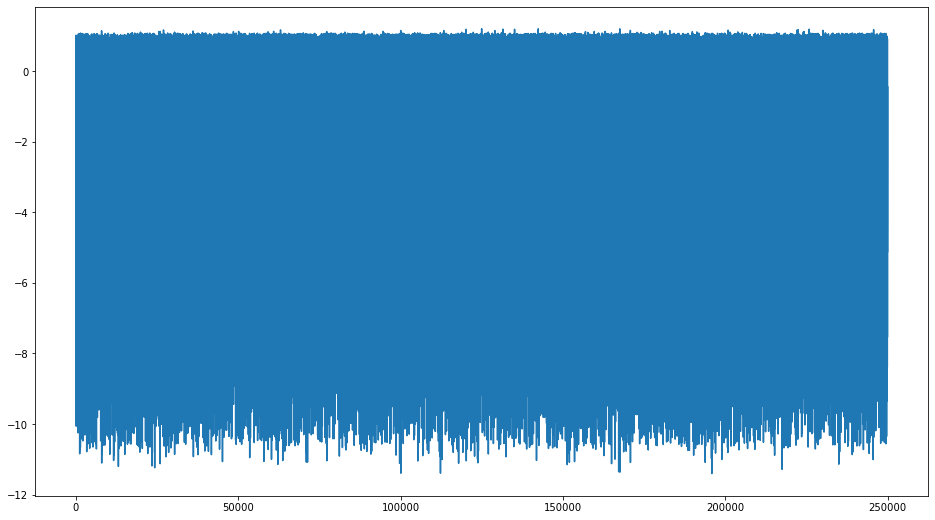

In [10]:
plt.figure(figsize=(16, 9))
plt.plot(data)

In [27]:
def OnlyPeaks(time_series):
    spikes_ind = argrelextrema(time_series, np.greater) 
    spikes = time_series[spikes_ind]
    return spikes

Соберем временной ряд:

In [19]:
series_numbers = ["first", "second", "third", "forth", "fifth", "sixth", "seventh", "eighth", "ninth", "tenth", "eleventh", "twelvth"]

In [20]:
time_series = np.empty(0)
for name in series_numbers:
    data = np.load("DK_time_series_" + name + ".npy")
    data = data[0] + data[3]
    time_series = np.concatenate((time_series, data))

In [21]:
time_series.shape

(3000000,)

In [23]:
np.save("DK_time_series_3000000", time_series)

Соберем статистики:

In [25]:
mean = time_series.mean()
std = time_series.std()

Hs = mean + 6 * std
Hs

2.439351511327332

In [28]:
peaks_data = OnlyPeaks(time_series)

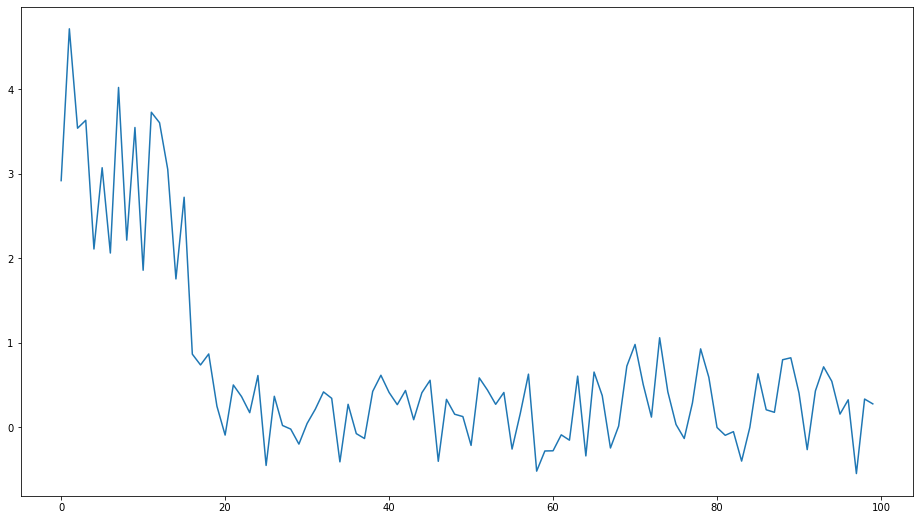

In [34]:
plt.figure(figsize=(16, 9))
plt.plot(peaks_data[:100])

In [35]:
peaks_data = peaks_data[20:]

In [36]:
peaks_data.shape

(208522,)

In [37]:
(peaks_data > Hs).sum()

454

In [38]:
np.save("DK_time_series_3000000_peaks", peaks_data)

Натравить LSTM, остальные сети, переделать тип предсказания, все в другом ноутбуке
